## Plotting Shots - ISL( Indian Super League)  Data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch

## Opening the dataset

To start analyzing the soccer data, we first need to load the data using the SBopen parser available in mplsoccer. We can do this by using the event method and passing the game ID as a parameter. This will load the event data into a dataframe called "df".

Next, we can extract the names of the two teams from the dataframe. Once we have the team names, we can filter the dataframe so that only the shot events remain. This will allow us to focus on analyzing the shots taken during the game.

The data used in this analysis was sourced from StatsBomb.StatsBomb data is widely used in soccer analysis and provides a reliable source for understanding match events.

In [3]:
from statsbombpy import sb
parser = Sbopen()
df, related, freeze, tactics = parser.event(3827767)
#get team names
team1, team2 = df.team_name.unique()
#A dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id') 

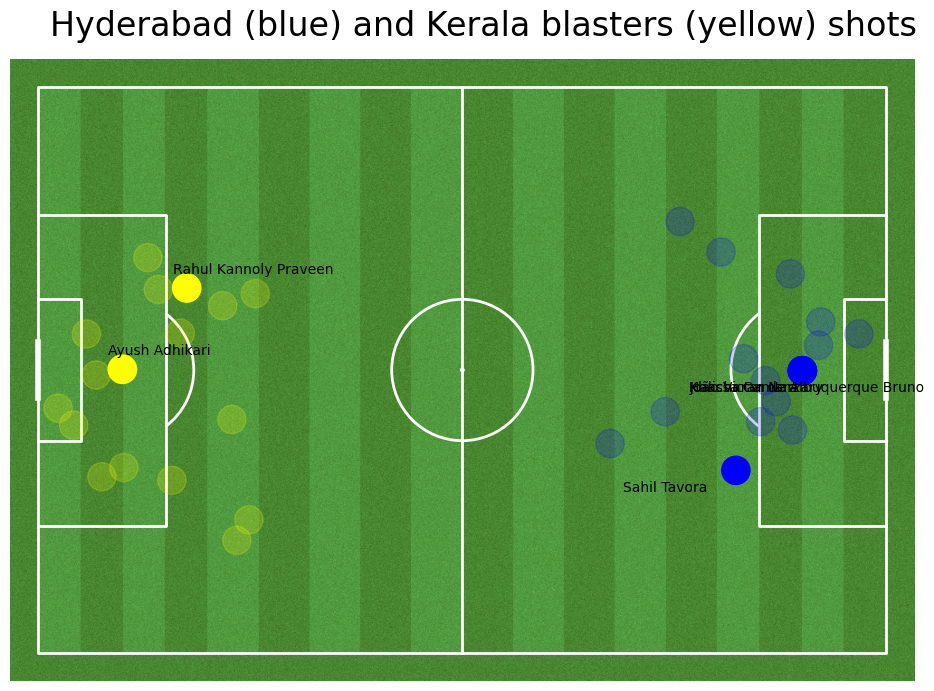

In [4]:
pitch = Pitch(pitch_color='grass', line_color='white',
              stripe=True)  # optional stripes
fig, ax = pitch.draw()
#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80
#Plot the shots by looping through them.
for i,shot in shots.iterrows():
    #get the information
    x=shot['x']
    y=shot['y']
    goal=shot['outcome_name']=='Goal'
    team_name=shot['team_name']
    #set circlesize
    circleSize=2
    #plot hyderabad
    if (team_name==team1):
        if goal:
            shotCircle=plt.Circle((x,y),circleSize,color="blue")
            plt.text(x-16,y+3,shot['player_name'])



        else:
            shotCircle=plt.Circle((x,y),circleSize,color="blue")
            shotCircle.set_alpha(.2)
    #plot kerala blasters
    else:
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="yellow")
            plt.text(pitchLengthX-x-2,pitchWidthY - y - 2 ,shot['player_name'], horizontalalignment='left')

        else:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="yellow")
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
#set title
fig.suptitle("Hyderabad (blue) and Kerala blasters (yellow) shots", fontsize = 24)
fig.set_size_inches(10, 7)
plt.show()

## Plotting shots on one half

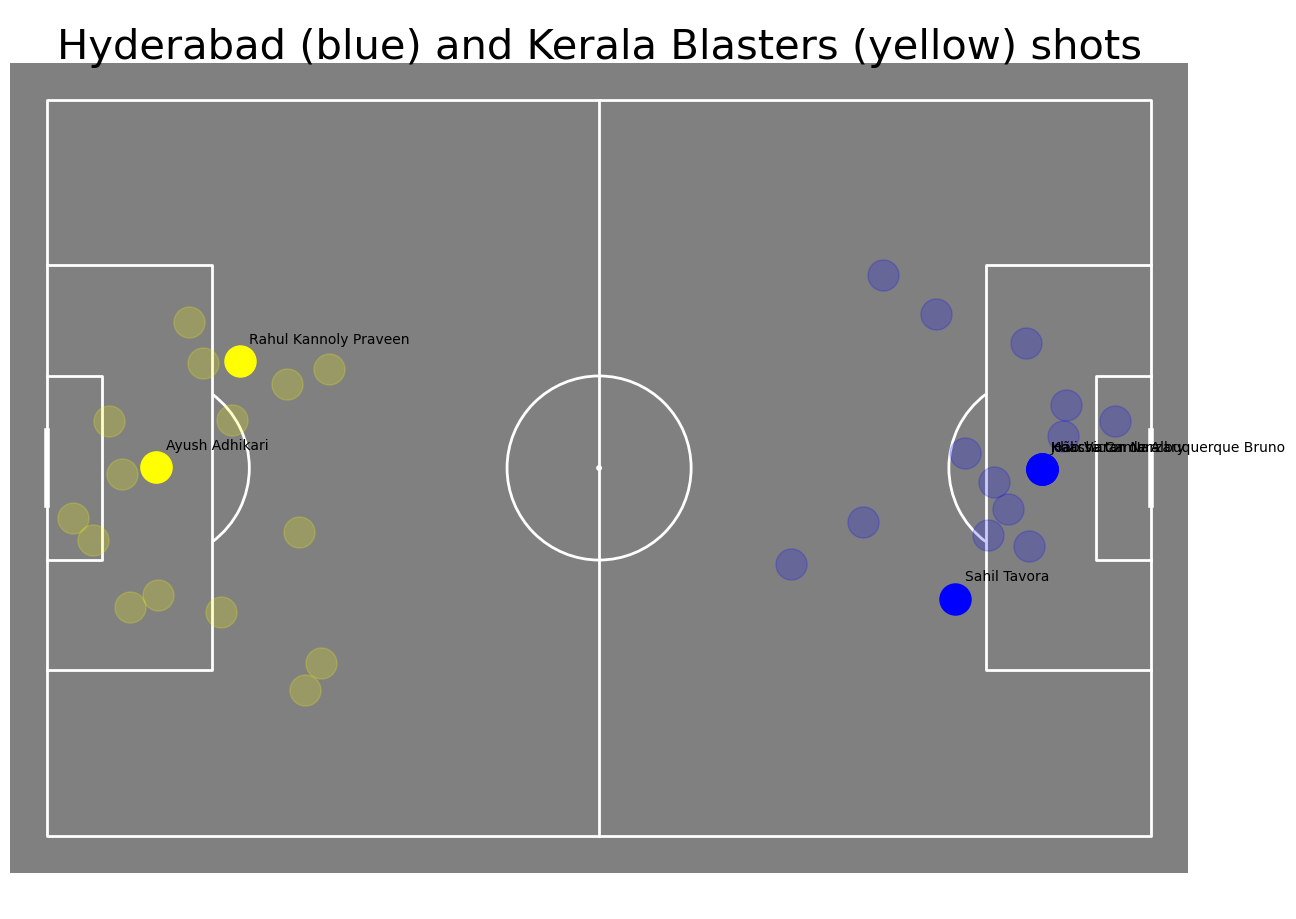

In [5]:
#create pitch
pitch = Pitch(pitch_color='grey', line_color='white')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#query
mask_hyderabad = (df.type_name == 'Shot') & (df.team_name == team1)
#finding rows in the df and keeping only necessary columns
df_hyderabad = df.loc[mask_hyderabad, ['x', 'y', 'outcome_name', "player_name"]]

#plot them - if shot ended with Goal - alpha 1 and add name
#for Hyderabad
for i, row in df_hyderabad.iterrows():
    if row["outcome_name"] == 'Goal':
    #make circle
       pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "blue", ax=ax['pitch'])
       pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 10)
    else:
       pitch.scatter(row.x, row.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])

mask_keralablasters = (df.type_name == 'Shot') & (df.team_name == team2)
df_keralablasters = df.loc[mask_keralablasters, ['x', 'y', 'outcome_name', "player_name"]]

#for Sweden we need to revert coordinates
for i, row in df_keralablasters.iterrows():
    if row["outcome_name"] == 'Goal':
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 1, s = 500, color = "yellow", ax=ax['pitch'])
       pitch.annotate(row["player_name"], (120 - row.x + 1, 80 - row.y - 2), ax=ax['pitch'], fontsize = 10)
    else:
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 0.2, s = 500, color = "yellow", ax=ax['pitch'])

fig.suptitle("Hyderabad (blue) and Kerala Blasters (yellow) shots", fontsize = 30)
plt.show()

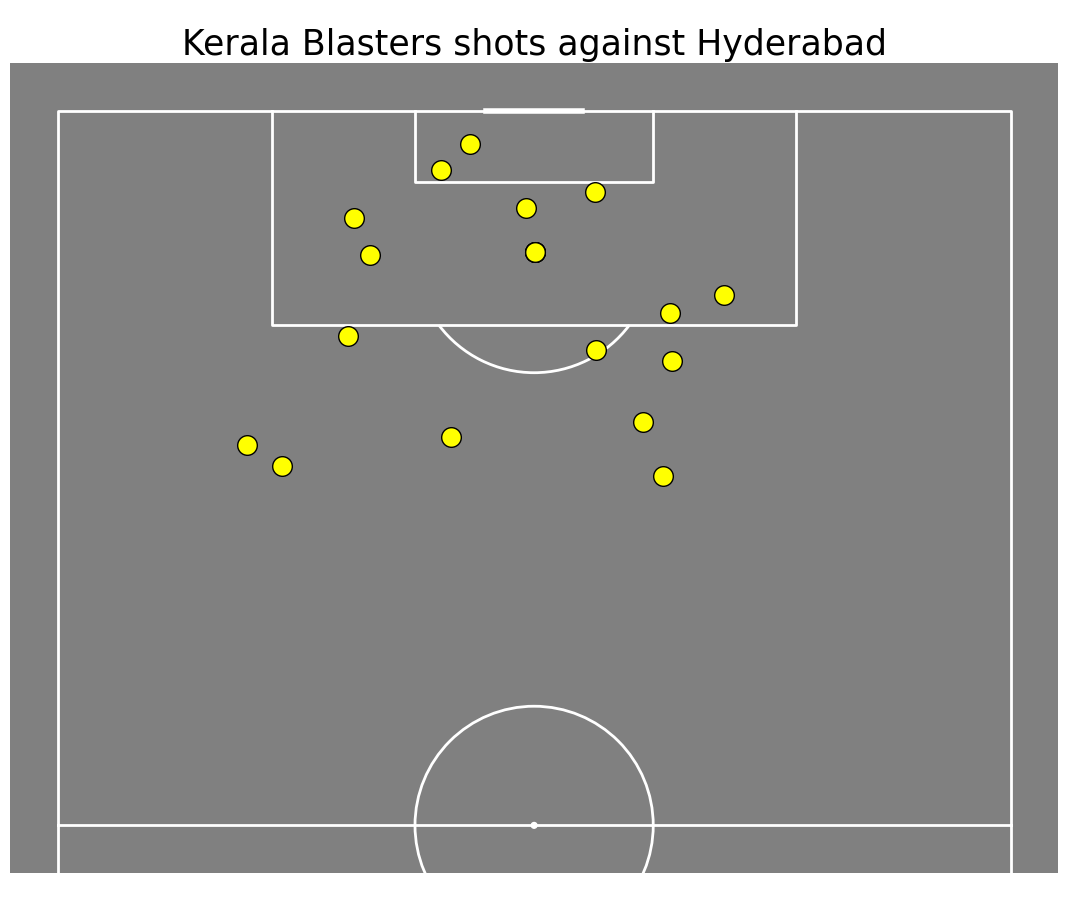

In [6]:
pitch = VerticalPitch(pitch_color='grey', line_color='white', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0,endnote_space=0)
#plotting all shots
pitch.scatter(df_keralablasters.x, df_keralablasters.y, alpha = 1, s = 200, color = "yellow", ax=ax['pitch'], edgecolors="black")
fig.suptitle("Kerala Blasters shots against Hyderabad", fontsize = 25)
plt.show()

## Plotting passes

In [7]:
passes = df.loc[df['type_name'] == 'Pass'].loc[df['sub_type_name'] != 'Throw-in'].set_index('id')

### Making the pass map using iterative solution

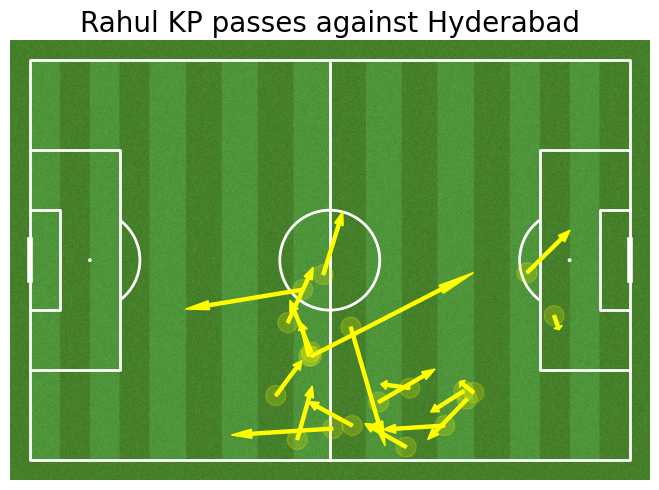

In [8]:
pitch = Pitch(pitch_color='grass', line_color='white',
              stripe=True)  # optional stripes
fig, ax = pitch.draw()
#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80

for i,thepass in passes.iterrows():
    #if pass made by Rahul Kannoly Praveen
    if thepass['player_name']=='Rahul Kannoly Praveen':
        x=thepass['x']
        y=thepass['y']
        #plot circle
        passCircle=plt.Circle((x,y),2,color="yellow")
        passCircle.set_alpha(.2)
        ax.add_patch(passCircle)
        dx=thepass['end_x']-x
        dy=thepass['end_y']-y
        #plot arrow
        passArrow=plt.Arrow(x,y,dx,dy,width=3,color="yellow")
        ax.add_patch(passArrow)

ax.set_title("Rahul KP passes against Hyderabad", fontsize = 20)
fig.set_size_inches(8, 5)
plt.show()

### Plotting multiple pass maps on one figure using mplsoccer functions

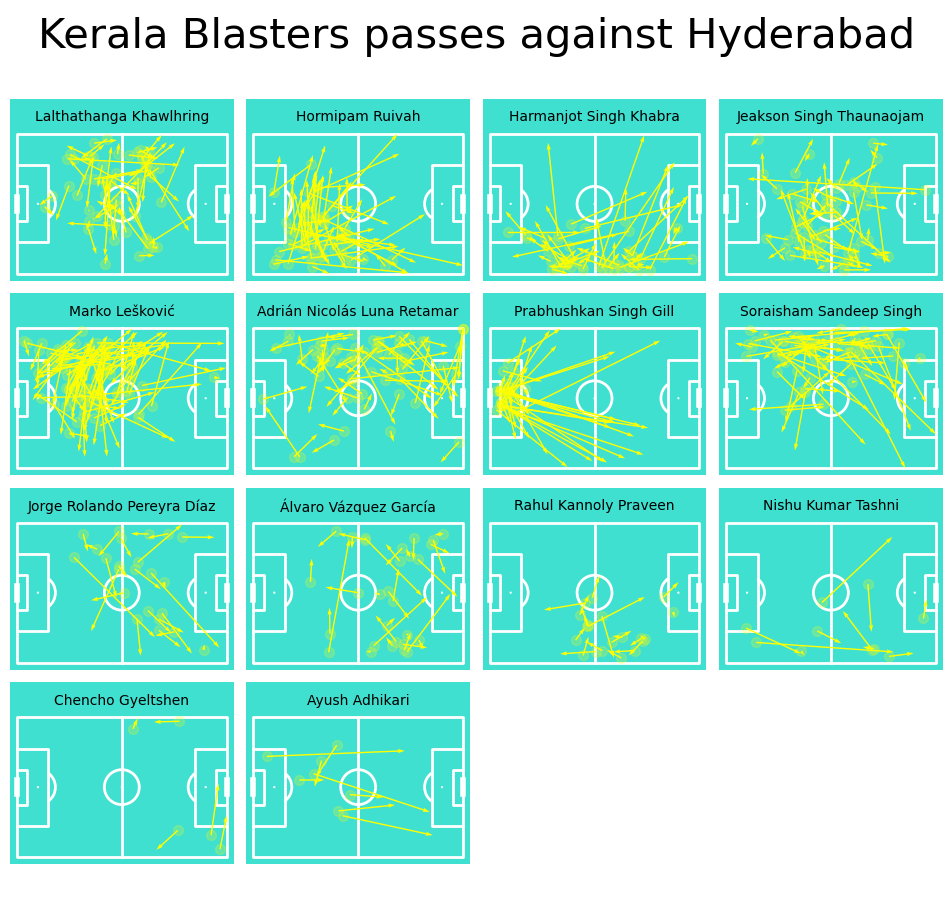

In [9]:
#prepare the dataframe of passes by blasters that were no-throw ins
mask_keralablasters = (df.type_name == 'Pass') & (df.team_name == "Kerala Blasters") & (df.sub_type_name != "Throw-in")
df_passes = df.loc[mask_keralablasters, ['x', 'y', 'end_x', 'end_y','player_name' ]]
#get the list of all players who made a pass
names = df_passes['player_name'].unique()

#draw 4x4 pitches
pitch = Pitch(pitch_color='turquoise', line_color='white', pad_top=20)
fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)

#for each player
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put player name over the plot
    ax.text(60, -10, name,
            ha='center', va='center', fontsize=10)
    #take only passes by this player
    player_df = df_passes.loc[df_passes["player_name"] == name]
    #scatter
    pitch.scatter(player_df.x, player_df.y, alpha = 0.2, s = 50, color = "yellow", ax=ax)
    #plot arrow
    pitch.arrows(player_df.x, player_df.y,
            player_df.end_x, player_df.end_y, color = "yellow", ax=ax, width=1)

#We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()

#Another way to set title using mplsoccer
axs['title'].text(0.5, 0.5, 'Kerala Blasters passes against Hyderabad', ha='center', va='center', fontsize=30)
plt.show()

## Passing networks

In [10]:
#check for index of first sub
sub = df.loc[df["type_name"] == "Substitution"].loc[df["team_name"] == "Kerala Blasters"].iloc[0]["index"]
#make df with successfull passes by kerala blasters until the first substitution
mask_keralablasters = (df.type_name == 'Pass') & (df.team_name == "Kerala Blasters") & (df.index < sub) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")
#taking necessary columns
df_pass = df.loc[mask_keralablasters, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]
#adjusting that only the surname of a player is presented.
df_pass["player_name"] = df_pass["player_name"].apply(lambda x: str(x).split()[-1])
df_pass["pass_recipient_name"] = df_pass["pass_recipient_name"].apply(lambda x: str(x).split()[-1])

#### Vertices size and location

In [11]:
import pandas as pd

In [12]:
scatter_df = pd.DataFrame()
for i, name in enumerate(df_pass["player_name"].unique()):
    passx = df_pass.loc[df_pass["player_name"] == name]["x"].to_numpy()
    recx = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy = df_pass.loc[df_pass["player_name"] == name]["y"].to_numpy()
    recy = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
    scatter_df.at[i, "player_name"] = name
    #make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    #calculate number of passes
    scatter_df.at[i, "no"] = df_pass.loc[df_pass["player_name"] == name].count().iloc[0]

#adjust the size of a circle so that the player who made more passes
scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500)

#### Edges width

In [13]:
#counting passes between players
df_pass["pair_key"] = df_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_df = df_pass.groupby(["pair_key"]).x.count().reset_index()
lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)
#setting a treshold. You can try to investigate how it changes when you change it.
lines_df = lines_df[lines_df['pass_count']>2]

#### Plotting vertices

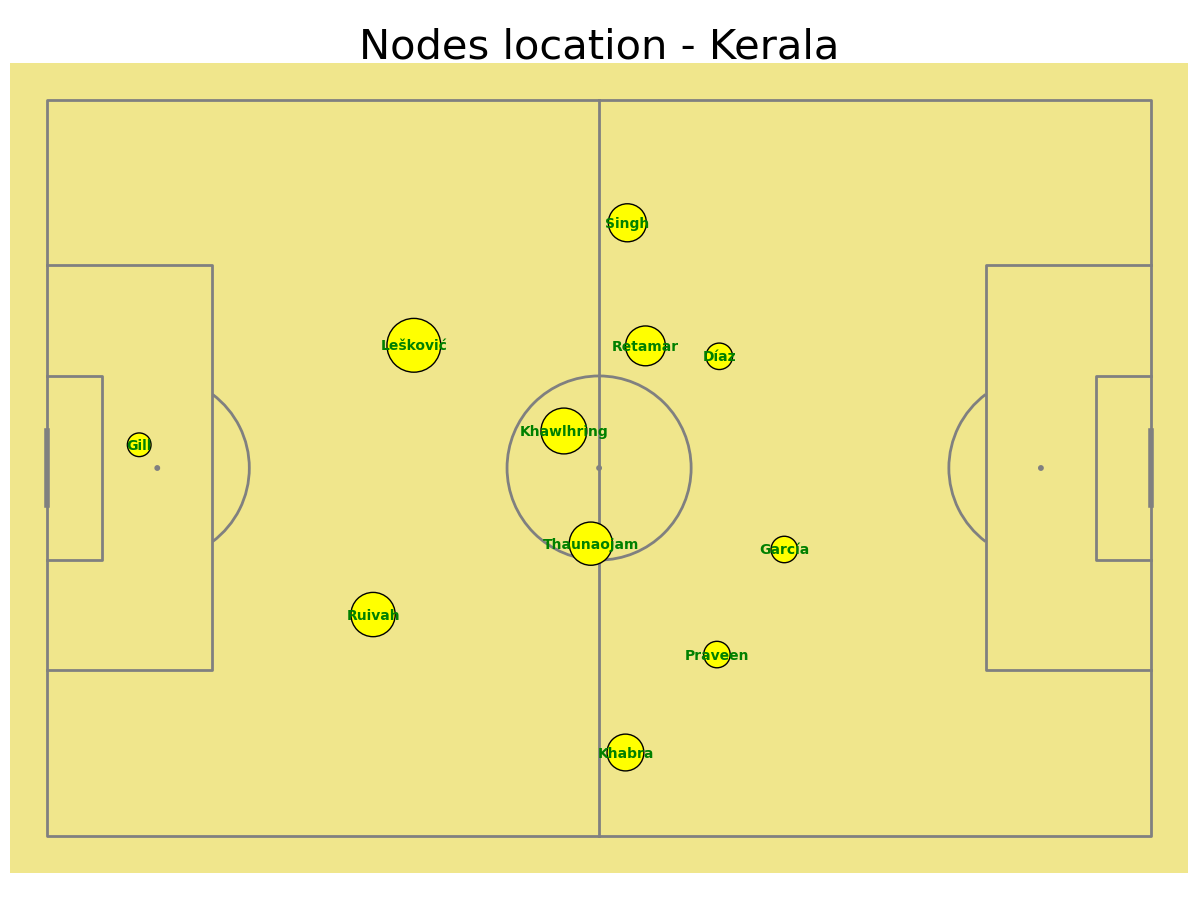

In [20]:
#Drawing pitch
pitch = Pitch(pitch_color='khaki',line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#Scatter the location on the pitch
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='yellow', edgecolors='black', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
#annotating player name
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='green', va='center', ha='center', weight = "bold", size=10, ax=ax["pitch"], zorder = 4)

fig.suptitle("Nodes location - Kerala", fontsize = 30)
plt.show()

#### Plotting edges

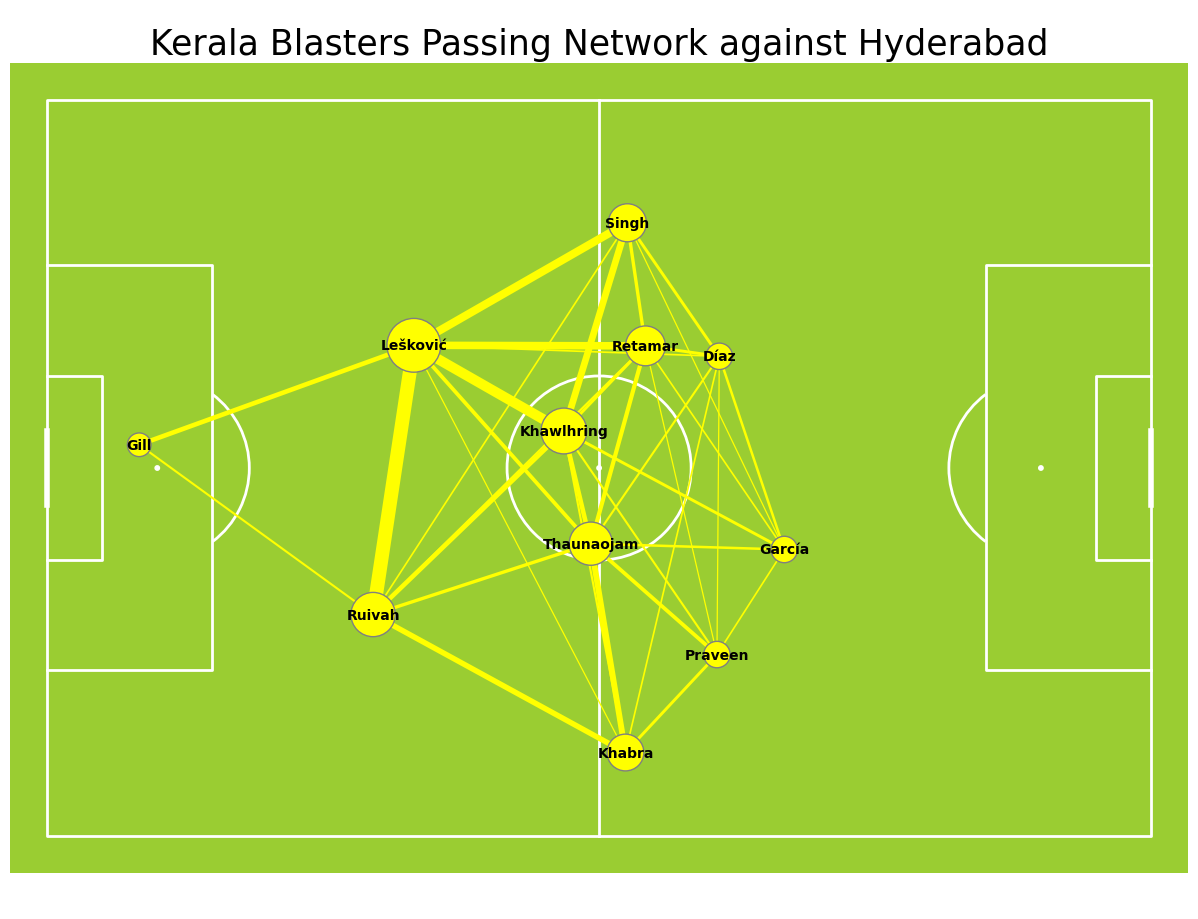

In [15]:
#plot once again pitch and vertices
pitch = Pitch(pitch_color='yellowgreen',line_color='white')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='yellow', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=10, ax=ax["pitch"], zorder = 4)

for i, row in lines_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]
        #take the average location of players to plot a line between them
        player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]
        #adjust the line width so that the more passes, the wider the line
        line_width = (num_passes / lines_df['pass_count'].max() * 10)
        #plot lines on the pitch
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                        alpha=1, lw=line_width, zorder=2, color="yellow", ax = ax["pitch"])

fig.suptitle("Kerala Blasters Passing Network against Hyderabad", fontsize = 25)
plt.show()

#### Centralisation

In [16]:
#calculate number of successful passes by player
no_passes = df_pass.groupby(['player_name']).x.count().reset_index()
no_passes.rename({'x':'pass_count'}, axis='columns', inplace=True)
#find one who made most passes
max_no = no_passes["pass_count"].max()
#calculate the denominator - 10*the total sum of passes
denominator = 10*no_passes["pass_count"].sum()
#calculate the nominator
nominator = (max_no - no_passes["pass_count"]).sum()
#calculate the centralisation index
centralisation_index = nominator/denominator
print("Centralisation index is ", centralisation_index)

Centralisation index is  0.10058823529411764
